<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Heart_Attack_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf

pd.set_option('display.max_columns', None)

DATA EXTRACTION

---

In [ ]:
heart = pd.read_csv(f"/content/drive/MyDrive/Raw_Data/heart_attack_indonesia.csv")
heart.head(5)

,ID,State,Age,HeartAttack,Gender,Cholesterol,SmokingHabits,PhysicalActivity,BMI,Hypertension,Diabetes,AlcoholConsumption,DietType,OccupationType,StressLevel,EducationLevel,MaritalStatus,FamilyHistoryHeartDisease,IncomeLevel,HealthcareAccess,SleepHours,UrbanOrRural,AirQualityIndex,PollutionLevel,EmploymentStatus
0,1,Pekanbaru,32,No,Male,179,Smoker,High,19.1,Yes,No,NaN,Unhealthy,Active,Moderate,Secondary,Single,No,Middle,Good,7.9,Urban,73,High,Unemployed
1,2,Makassar,15,Yes,Female,201,Non-smoker,High,26.9,No,Yes,Rarely,Balanced,Sedentary,Moderate,Secondary,Married,No,Middle,Average,8.5,Urban,266,Moderate,Unemployed
2,3,Surabaya,41,No,Female,167,Non-smoker,Moderate,29.6,Yes,No,NaN,Balanced,Active,Low,Primary,Single,No,Middle,Poor,7.3,Urban,132,Moderate,Employed
3,4,Malang,31,No,Male,287,Smoker,Moderate,19.4,No,No,Rarely,Unhealthy,Sedentary,Low,Higher,Single,Yes,Middle,Good,4.8,Rural,64,High,Unemployed
4,5,Bali,19,No,Male,239,Smoker,High,18.5,No,No,NaN,Balanced,Active,Low,Secondary,Married,No,Low,Poor,6.0,Urban,155,Moderate,Unemployed


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170501 entries, 0 to 170500
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         170501 non-null  int64  
 1   State                      170501 non-null  object 
 2   Age                        170501 non-null  int64  
 3   HeartAttack                170501 non-null  object 
 4   Gender                     170501 non-null  object 
 5   Cholesterol                170501 non-null  int64  
 6   SmokingHabits              170501 non-null  object 
 7   PhysicalActivity           170501 non-null  object 
 8   BMI                        170501 non-null  float64
 9   Hypertension               170501 non-null  object 
 10  Diabetes                   170501 non-null  object 
 11  AlcoholConsumption         113873 non-null  object 
 12  DietType                   170501 non-null  object 
 13  OccupationType             17

DATA PREPROCESSING

---

In [ ]:
heart['HeartAttack'].value_counts()

,count
HeartAttack,
No,127826
Yes,42675


In [ ]:
Legit = heart[heart.HeartAttack=='Yes']
Non = heart[heart.HeartAttack=='No']

Non_sample = Non.sample(n=42675)

Heart = pd.concat([Non_sample, Legit], axis=0).sort_index()

Heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85350 entries, 0 to 170500
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         85350 non-null  int64  
 1   State                      85350 non-null  object 
 2   Age                        85350 non-null  int64  
 3   HeartAttack                85350 non-null  object 
 4   Gender                     85350 non-null  object 
 5   Cholesterol                85350 non-null  int64  
 6   SmokingHabits              85350 non-null  object 
 7   PhysicalActivity           85350 non-null  object 
 8   BMI                        85350 non-null  float64
 9   Hypertension               85350 non-null  object 
 10  Diabetes                   85350 non-null  object 
 11  AlcoholConsumption         56961 non-null  object 
 12  DietType                   85350 non-null  object 
 13  OccupationType             85350 non-null  object 

In [ ]:
Heart['AlcoholConsumption'] = Heart.groupby('HeartAttack')['AlcoholConsumption'].transform(lambda x: x.fillna(x.mode()[0]))

Heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85350 entries, 0 to 170500
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         85350 non-null  int64  
 1   State                      85350 non-null  object 
 2   Age                        85350 non-null  int64  
 3   HeartAttack                85350 non-null  object 
 4   Gender                     85350 non-null  object 
 5   Cholesterol                85350 non-null  int64  
 6   SmokingHabits              85350 non-null  object 
 7   PhysicalActivity           85350 non-null  object 
 8   BMI                        85350 non-null  float64
 9   Hypertension               85350 non-null  object 
 10  Diabetes                   85350 non-null  object 
 11  AlcoholConsumption         85350 non-null  object 
 12  DietType                   85350 non-null  object 
 13  OccupationType             85350 non-null  object 

In [ ]:
#col_to_drop =['ID', 'EmploymentStatus', 'UrbanOrRural', \
              #'OccupationType', 'SmokingHabits', 'IncomeLevel', \
              #'MaritalStatus', 'EducationLevel', 'DietType']

#for col in col_to_drop:
  #Heart= Heart.drop(col, axis=1)

In [ ]:
sns.set()

DATA ANALYSIS

---

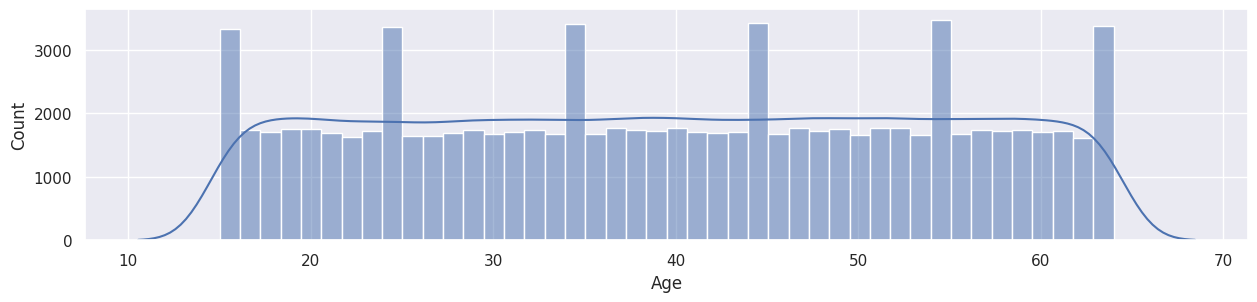

In [ ]:
plt.figure(figsize=(15,3))
sns.histplot(Heart['Age'], kde=True,
             kde_kws=dict(cut=3))
plt.show()

In [ ]:
enc = LabelEncoder()

obj = Heart.select_dtypes(include='object').columns

for i in obj:
  Heart[i] = enc.fit_transform(Heart[i])
Heart.head(2)

,ID,State,Age,HeartAttack,Gender,Cholesterol,SmokingHabits,PhysicalActivity,BMI,Hypertension,Diabetes,AlcoholConsumption,DietType,OccupationType,StressLevel,EducationLevel,MaritalStatus,FamilyHistoryHeartDisease,IncomeLevel,HealthcareAccess,SleepHours,UrbanOrRural,AirQualityIndex,PollutionLevel,EmploymentStatus
0,1,10,32,0,1,179,1,0,19.1,1,0,0,1,0,2,2,1,0,2,1,7.9,1,73,0,1
1,2,6,15,1,0,201,0,0,26.9,0,1,1,0,1,2,2,0,0,2,0,8.5,1,266,2,1


In [ ]:
corr = Heart.corr()

In [ ]:
print(corr['AirQualityIndex'].sort_values(ascending=False).round(3)*100)

AirQualityIndex              100.0
DietType                       0.7
SmokingHabits                  0.4
PollutionLevel                 0.4
Hypertension                   0.3
AlcoholConsumption             0.3
Diabetes                       0.3
PhysicalActivity               0.2
OccupationType                 0.2
State                          0.1
Age                            0.1
EmploymentStatus               0.1
BMI                            0.1
IncomeLevel                    0.1
SleepHours                    -0.0
HeartAttack                   -0.1
FamilyHistoryHeartDisease     -0.1
EducationLevel                -0.1
StressLevel                   -0.1
MaritalStatus                 -0.2
HealthcareAccess              -0.3
ID                            -0.3
Cholesterol                   -0.3
UrbanOrRural                  -0.5
Gender                        -0.6
Name: AirQualityIndex, dtype: float64


MACHINE LEARNING MODEL BUILDING (RFC)

---

In [ ]:
X = Heart.drop(['HeartAttack', 'ID'], axis=1)
y = Heart['HeartAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.35, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

MODEL EVALUATION

---

In [ ]:
test_pred = clf.predict(X_test)
acc_score = accuracy_score(y_test, test_pred)
print(f"Accuracy score for test is {acc_score}")

Importance = clf.feature_importances_.round(3)*100
Columns = X.columns
Feat_import = pd.DataFrame({'Feature': Columns,
                            'Importance': Importance}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(Feat_import)

Accuracy score for test is 0.4988785860141265

Feature Importance:
                      Feature  Importance
20            AirQualityIndex        11.6
6                         BMI        11.4
3                 Cholesterol        11.3
18                 SleepHours        10.2
1                         Age        10.2
0                       State         7.8
5            PhysicalActivity         3.1
17           HealthcareAccess         3.1
12                StressLevel         3.1
21             PollutionLevel         3.0
16                IncomeLevel         3.0
13             EducationLevel         2.9
19               UrbanOrRural         1.9
11             OccupationType         1.9
4               SmokingHabits         1.9
14              MaritalStatus         1.8
15  FamilyHistoryHeartDisease         1.8
9          AlcoholConsumption         1.8
2                      Gender         1.8
22           EmploymentStatus         1.8
7                Hypertension         1.7
10       

MODEL BUILDING (TENSORFLOW)

---

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4967 - loss: 1.2405
Epoch 2/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5000 - loss: 0.7333
Epoch 3/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4968 - loss: 0.7326
Epoch 4/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5019 - loss: 0.7218
Epoch 5/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5029 - loss: 0.7288
Epoch 6/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4977 - loss: 0.7194
Epoch 7/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5017 - loss: 0.7184
Epoch 8/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5014 - loss: 0.7169
Epoch 9/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4995 - loss: 0.7154
Epoch 10/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4993 - loss: 0.7115
Epoch 11/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4993 - loss: 0.7067
Epoch 12/100
1734/

In [ ]:
ann_predict = ann.predict(X_test)
ann_predict = (ann_predict > 0.5)
ann_score = accuracy_score(y_test, ann_predict)
print(f"Accuracy score for test is {ann_score}")

934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy score for test is 0.49998326247782277
